# Sinais e Representação por Série de Fourier
### Apresentando o Fenômeno de Gibbs

### Aluno: Lucas de Souza Abdalah
### Professores:  André Lima e João César

## Bibliotecas

* $Numpy$: abreviatura para numeric python, é a biblioteca responsável pela funções numéricas e de programação científica usadas. Qualquer referência acerca de suas funções pode ser encontrada em http://www.numpy.org/
* $Matplotlib$: é a biblioteca padrão do python para o plot de gráficos. Ela tem funções que permitem gráficos 2d e 3d. A referência da biblioteca pode ser encontrada em https://matplotlib.org
* $Matplolib.inline$: Para incluir o gráfico na própria célula do notebook

In [129]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Explanação Teórica
* A onda senoidal é a onda mais simples ou pura que existe, pois se origina da projeção sobre uma reta de um ponto girando em circulo.
* A senóide tem uma única frequência, e para completar a sua descrição basta indicar a sua amplitude.
* Fourier mostrou que um sinal periódico $x(t)$ com período $T_0$ pode ser escrito como:

\begin{align}
    x(t) = \sum_{k=-\infty}^{\infty}c_{k} e^{(jk\omega_0t)}\\
    c_k = \dfrac{1}{T}\ \int_{-T/2}^{T/2} x(t) e^{(-jk\omega_0t)}dt 
\end{align}

* A função $x(t)$ possui um período fundamental $T$ e sua frequência fundamental é definida como $\omega_0 =  \frac{2\pi}{T}$.
Observando o gráfico teremos: $x(t) = p$, quando $- m < t < m$, caso contrário,  $x(t) = 0$.
	
* Definiremos por conveniência que o período é $2a$, então $a=2m$. Feitas as primeiras ponderações e definições necessárias podemos calcular os coeficientes utilizando a equação (2):

\begin{align}
    c_k = \dfrac{1}{2a}\ \int_{-a}^{a} p e^{(-jk\omega_0t)}dt 
\end{align}
	
* Sendo $p$ constante, sairá da integral.
\begin{align}
    c_k = \dfrac{p}{2a}\ \int_{-a}^{a} e^{(-jk\omega_0t)}dt 
\end{align}

* Agora, teremos $c_0 = p$ e o termo geral para $k \neq 0$:

\begin{align}
c_k = \dfrac{pj}{2k\omega_0} (e^{(-jk\omega_0a)} - e^{(jk\omega_0a)})
\end{align}
	
* Aplicando os coeficientes na série:

\begin{align}
x(t) = \dfrac{c_0}{2} + \sum_{k=-\infty}^{-1} c_{k} e^{(jk\omega_0t)}+ \sum_{k=1}^{\infty} c_{k}e^{(jk\omega_0t)}
\end{align}


\begin{align}
    x(t) =  \dfrac{p}{2} + \dfrac{pj}{2\omega_0}\bigg\{\sum_{k=-\infty}^{-1}\dfrac{1}{k} (e^{(-jk\omega_0a)} - e^{(jk\omega_0a)})e^{(jk\omega_0t)} + \sum_{k=1}^{\infty}\dfrac{1}{k}(e^{(-jk\omega_0a)} - e^{(jk\omega_0a)})e^{(jk\omega_0t)}\bigg\}
\end{align}

* Obtendo, finalmente, a série de Fourier do sinal.

## Implementação
#### Função "$fsSW$": 
* Será a função que executa o somatório proposto na explanação teórica em laço de repetição, em função do parâmetro $ t $, porém, como há uma limitação computacinal, os limites superior e inferior são definidos por $k$_$upperbound$ e - $k$_$upperbound$, respectivamente. Além de receber a amplitude da onda $p\_amp$ e o período $T$.


In [130]:
def fsSW(t, T, p_amp, k_upperbound):
    #Define-se o periodo "T" e o intervalo "a" de que a onda permanece em amplitude determinada
    a = T/4
    #A relação da frequencia fundamental com o periodo
    w_zero =2*np.pi/T
    #A constante que multiplica o somatorio (Tendo em vista economia de processamento)
    Q = (p_amp*1j)/(2*a*w_zero)
    #Iniciando o acumulador da serie de fourier 
    fsSW = 0
    
    #Aproximacao do somatorio da funcao calculada
    for k in range((-1)*k_upperbound, k_upperbound, 1):
        #Calcula o termo de k=0
        if k == 0:
            fsSW = fsSW + 0.5*p_amp
        #Calcula os termos restantes
        else:
            fsSW = fsSW + 0.5*(Q/k)*((np.exp(1j*k*w_zero*(-a))) - np.exp(1j*k*w_zero*(a)))*np.exp(1j*k*w_zero*t)
    #Retorna a soma final
    return(fsSW)

## Implementação
#### $Valores$ $de$ "$x$": 
* $numpy.linspace$: Gera valores crescentes igualmente espaçados, dentro do intervalo proposto.
* $matplotlib.pyplot$: Os comandos usados são bem difundidos e servem para plotar e detalhar o gráfico.

In [131]:
#Gerando variaveis no eixo do tempo
t = np.linspace(-3*np.pi, 3*np.pi, 500)

In [132]:
#Atribuindo as variaveis do a ao d o retorno da funcao com os parametros indicados
a = fsSW(t, 2*np.pi, 1, 2)
b = fsSW(t, 2*np.pi, 1, 10)
c = fsSW(t, 2*np.pi, 1, 50)
d = fsSW(t, 2*np.pi, 1, 1000)
e = fsSW(t, 2*np.pi, 1, 10000)

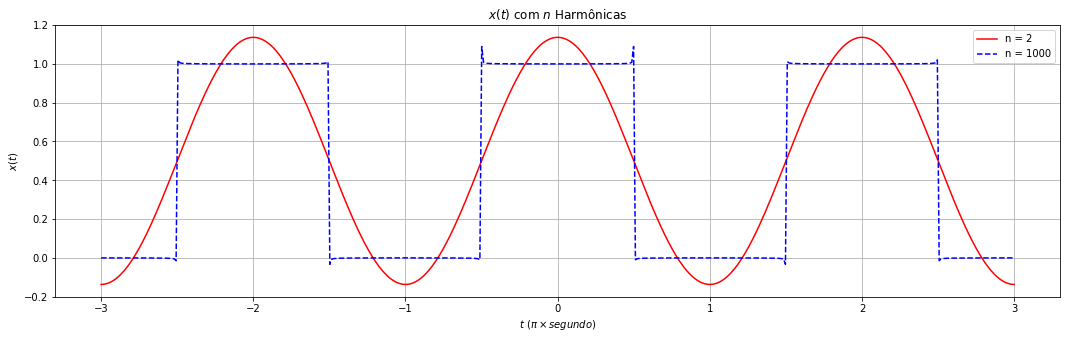

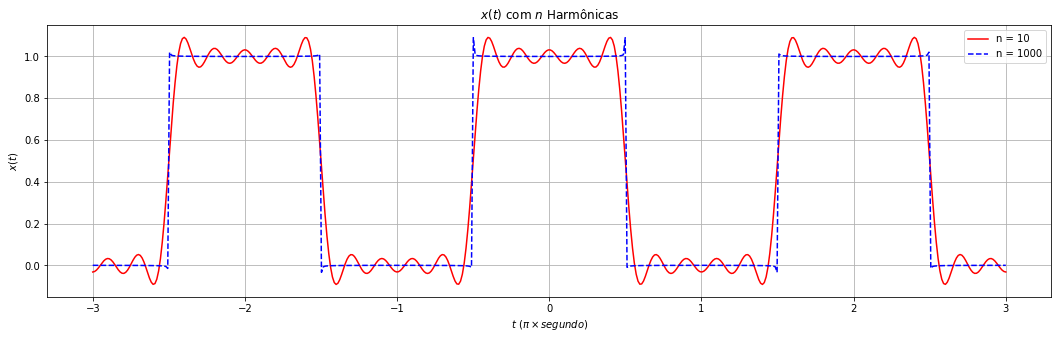

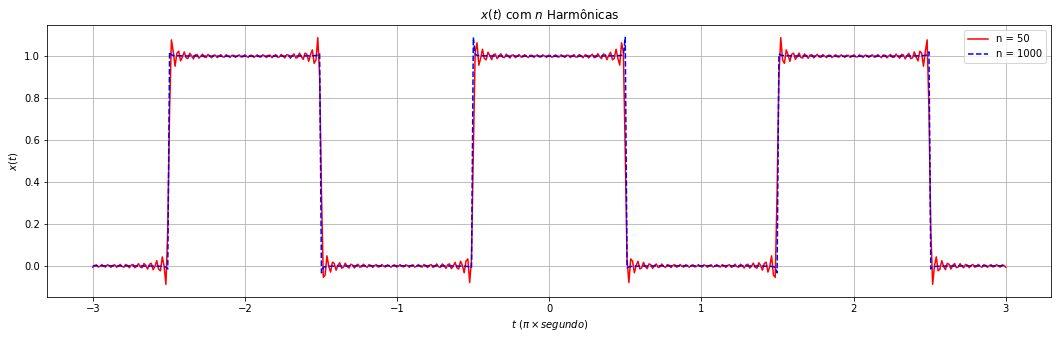

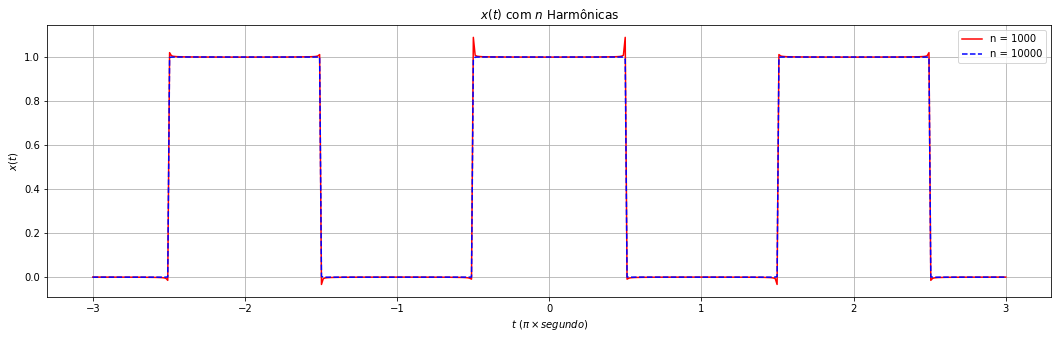

In [133]:
t = t/np.pi;
# Primeiro Caso
plt.figure('1', figsize=(18,5))
plt.grid('on')
plt.plot(t, a , color = 'r')
plt.plot(t, d, color = 'b', linestyle = '--')
plt.legend(['n = 2', 'n = 1000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Segundo Caso
plt.figure('2', figsize=(18,5))
plt.grid('on')
plt.plot(t, b, color = 'r')
plt.plot(t, d, color = 'b', linestyle = '--')
plt.legend(['n = 10', 'n = 1000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Terceiro Caso
plt.figure('3', figsize=(18,5))
plt.grid('on')
plt.plot(t, c, color = 'r')
plt.plot(t, d, color = 'b', linestyle = '--')
plt.legend(['n = 50', 'n = 1000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Quarto Caso
plt.figure('4', figsize=(18,5))
plt.grid('on')
plt.plot(t, d, color = 'r')
plt.plot(t, e, color = 'b', linestyle = '--')
plt.legend(['n = 1000', 'n = 10000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Mostrar Plots 
plt.show()

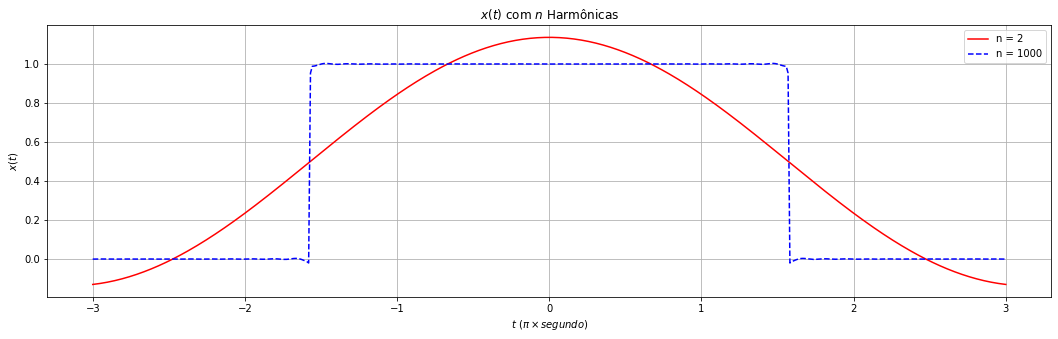

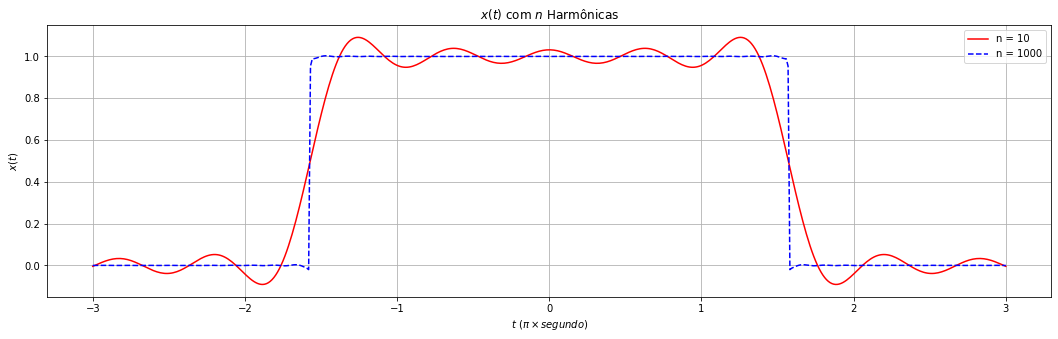

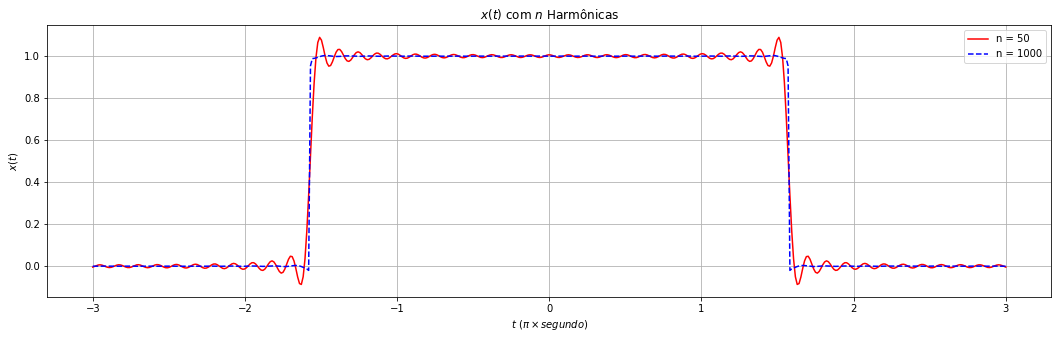

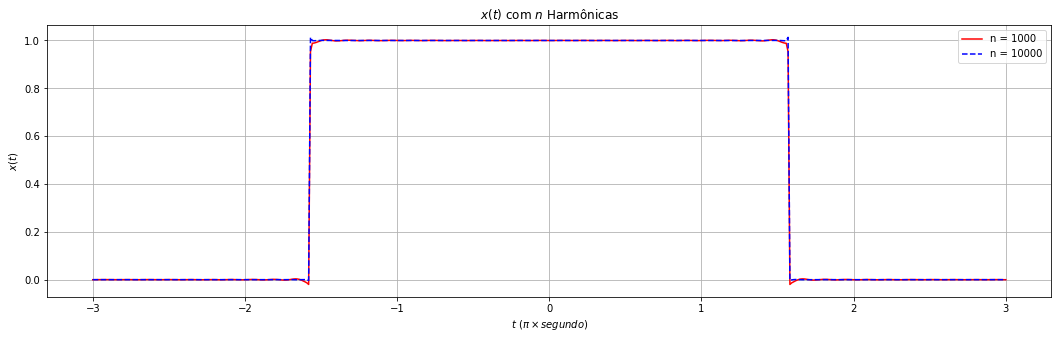

In [134]:
#Gerando variaveis no eixo do tempo
t = np.linspace(-3*np.pi, 3*np.pi, 500)
t = t/np.pi;

#Atribuindo as variaveis do a ao d o retorno da funcao com os parametros indicados
a = fsSW(t, 2*np.pi, 1, 2)
b = fsSW(t, 2*np.pi, 1, 10)
c = fsSW(t, 2*np.pi, 1, 50)
d = fsSW(t, 2*np.pi, 1, 1000)
e = fsSW(t, 2*np.pi, 1, 10000)
# t = t/np.pi;

# Primeiro Caso
plt.figure('1', figsize=(18,5))
plt.grid('on')
plt.plot(t, a , color = 'r')
plt.plot(t, d, color = 'b', linestyle = '--')
plt.legend(['n = 2', 'n = 1000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Segundo Caso
plt.figure('2', figsize=(18,5))
plt.grid('on')
plt.plot(t, b, color = 'r')
plt.plot(t, d, color = 'b', linestyle = '--')
plt.legend(['n = 10', 'n = 1000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Terceiro Caso
plt.figure('3', figsize=(18,5))
plt.grid('on')
plt.plot(t, c, color = 'r')
plt.plot(t, d, color = 'b', linestyle = '--')
plt.legend(['n = 50', 'n = 1000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Quarto Caso
plt.figure('4', figsize=(18,5))
plt.grid('on')
plt.plot(t, d, color = 'r')
plt.plot(t, e, color = 'b', linestyle = '--')
plt.legend(['n = 1000', 'n = 10000'])
plt.title(r'$x(t)$ com $n$ Harmônicas')
plt.xlabel(r'$t \ (\pi \times segundo)$')
plt.ylabel(r'$x(t)$')

# Mostrar Plots 
plt.show()